In [1]:
import glob
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

images = []
for filename in glob.glob('images/*.jpeg'):
    image = imread(filename)
    images.append(image)
    
images = np.array(images) / 255
    
print(f"Loaded {len(images)} images")

Loaded 6 images


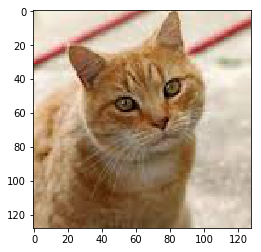

In [2]:
plt.imshow(images[2])
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Conv2D, UpSampling2D
from keras import objectives
from keras import backend as K

In [276]:
def custom_loss(x, y):
    #loss_mae = K.mean(objectives.mean_absolute_error(x, y))
    #loss_mse = K.mean(objectives.mean_squared_error(x, y))
        
    return K.sum(K.abs(x - y))

In [283]:
def Simple_decoder():
    model = Sequential()
    model.add(Dense(64*64*64, input_shape=(1,))) # we'll pass a single value as input
    model.add(Activation('relu'))
    model.add(Reshape((64, 64, 64)))
    model.add(Conv2D(32, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(UpSampling2D(2))
    model.add(Conv2D(16, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(3, 3, padding='same'))
    model.add(Activation('sigmoid'))

    model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])
    return model

simple_decoder = Simple_decoder()
simple_decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 262144)            524288    
_________________________________________________________________
activation_289 (Activation)  (None, 262144)            0         
_________________________________________________________________
reshape_73 (Reshape)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 64, 64, 32)        18464     
_________________________________________________________________
activation_290 (Activation)  (None, 64, 64, 32)        0         
_________________________________________________________________
up_sampling2d_73 (UpSampling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 128, 128, 16)      4624      
__________

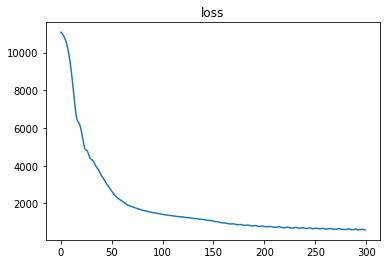

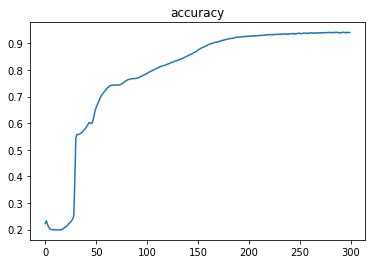

In [284]:
history = simple_decoder.fit(np.array([1]), images[4:5], epochs=300, verbose=0)

plt.title('loss')
plt.plot(history.history['loss'])
plt.show()

plt.title('accuracy')
plt.plot(history.history['acc'])
plt.show()

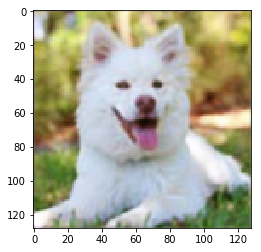

In [285]:
pred = simple_decoder.predict(np.array([1]))[0]

plt.imshow(pred)
plt.show()